## Maximizing Revenue for Taxi Cab Drivers through Payment Type Hypothesis Analysis

#### Problem statement
In fast paced taxi booking sector, maing the most of revenue is essential for long term success and driver happiness. Our goal is to use data-driver insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

#### Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare and method of payment. We use python hypothesis testing and descriptive analysis to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the ares for those who pay with credit cards vserus those who with cash.

#### Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negetively impacting customer experience?

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')

In [2]:
#Reading the datasets and combining into a single pandas dataframe
df1=pd.read_parquet('yellow_tripdata_2024-01.parquet', engine='pyarrow')
df2=pd.read_parquet('yellow_tripdata_2024-02.parquet', engine='pyarrow')
df3=pd.read_parquet('yellow_tripdata_2024-03.parquet', engine='pyarrow')
df4=pd.read_parquet('yellow_tripdata_2024-04.parquet', engine='pyarrow')
df5=pd.read_parquet('yellow_tripdata_2024-05.parquet', engine='pyarrow')
df6=pd.read_parquet('yellow_tripdata_2024-06.parquet', engine='pyarrow')
df7=pd.read_parquet('yellow_tripdata_2024-07.parquet', engine='pyarrow')
df8=pd.read_parquet('yellow_tripdata_2024-08.parquet', engine='pyarrow')
df9=pd.read_parquet('yellow_tripdata_2024-09.parquet', engine='pyarrow')
df10=pd.read_parquet('yellow_tripdata_2024-10.parquet', engine='pyarrow')
df= pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10], ignore_index = True)
df_copy = df.copy
df.shape

(33854980, 19)

In [3]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.5,0.5,6.90,0.0,1.0,41.50,2.5,0.00
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.00,0.0,1.0,64.95,0.0,1.75
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.5,0.5,0.00,0.0,1.0,30.40,2.5,0.00
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.00,0.0,1.0,36.00,2.5,0.00
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,N,113,113,2,3.0,1.0,0.5,0.00,0.0,1.0,8.00,2.5,0.00


### Exploratory Data Analysis

In [4]:
# checking the data types
df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [5]:
distinct_value = df['payment_type'].value_counts()
print(distinct_value)

payment_type
1    24999870
2     4599611
0     3391267
4      628268
3      235960
5           4
Name: count, dtype: int64


Since we are just using Cash and Credit Card in our hypothesis testing, dropping the other payment types to make the dataset smaller.

In [6]:
df = df[df["payment_type"].isin([1, 2])]

Changing other data types according to the needs

In [7]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [8]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
4191039,1,2024-02-13 19:53:17,2024-02-13 20:00:17,1.0,1.40,1.0,N,79,211,1,9.3,3.5,0.5,2.85,0.00,1.0,17.15,2.5,0.0,7.000000
13410523,1,2024-05-03 22:53:27,2024-05-03 23:11:54,2.0,3.90,1.0,N,97,107,1,19.8,3.5,0.5,4.95,0.00,1.0,29.75,2.5,0.0,18.450000
2101535,2,2024-01-24 16:01:19,2024-01-24 16:49:05,1.0,10.10,1.0,N,230,138,1,49.2,7.5,0.5,6.00,6.94,1.0,73.64,2.5,0.0,47.766667
3729064,1,2024-02-08 20:12:20,2024-02-08 20:31:01,3.0,0.20,1.0,N,161,161,1,15.6,3.5,0.5,0.00,0.00,1.0,20.60,2.5,0.0,18.683333
22931749,2,2024-07-30 05:55:38,2024-07-30 05:59:55,1.0,0.85,1.0,N,100,161,1,6.5,1.0,0.5,2.30,0.00,1.0,13.80,2.5,0.0,4.283333


In [9]:
#dropping some columns
df = df.drop(columns=['store_and_fwd_flag', 'tolls_amount', 'improvement_surcharge', 'extra', 'mta_tax'])

In [10]:
#checking unique passenger counts
df['passenger_count'].unique()

array([1., 2., 0., 4., 3., 5., 6., 8., 7., 9.])

In [11]:
df.dropna(inplace=True)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
#the proportion of each unique value in the passenger_count
df['passenger_count'].value_counts(normalize=True)

passenger_count
1.0    0.774130
2.0    0.144665
3.0    0.033816
4.0    0.020603
0.0    0.011217
5.0    0.009290
6.0    0.006272
8.0    0.000005
7.0    0.000001
9.0    0.000001
Name: proportion, dtype: float64

In [14]:
##the proportion of each unique value in the payment_type
df['payment_type'].value_counts(normalize=True)

payment_type
1    0.844605
2    0.155395
Name: proportion, dtype: float64

In [15]:
df['payment_type'] = df['payment_type'].astype('int64')

In [16]:
#replacing the payment type from numerical data type to string data
df['payment_type'].replace([1,2],['Card','Cash'], inplace=True)

In [17]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee,duration
count,2.959948e+07,29599477,29599477,2.959948e+07,2.959948e+07,2.959948e+07,2.959948e+07,2.959948e+07,2.959948e+07,2.959948e+07,2.959948e+07,2.959948e+07,2.959948e+07,2.959948e+07
mean,1.757641e+00,2024-06-03 03:42:59.792855296,2024-06-03 04:00:24.854592256,1.331463e+00,3.552005e+00,2.346014e+00,1.650052e+02,1.644116e+02,1.966432e+01,3.681063e+00,2.889549e+01,2.289030e+00,1.539411e-01,1.741770e+01
min,1.000000e+00,2002-12-31 16:46:07,2002-12-31 17:24:07,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.164600e+03,-9.235000e+01,-2.169290e+03,-2.500000e+00,-1.750000e+00,-1.427050e+03
25%,2.000000e+00,2024-03-19 19:00:10,2024-03-19 19:13:45,1.000000e+00,1.010000e+00,1.000000e+00,1.320000e+02,1.140000e+02,9.300000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00,7.633333e+00
50%,2.000000e+00,2024-05-31 16:47:55,2024-05-31 17:09:38,1.000000e+00,1.720000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.350000e+01,2.940000e+00,2.100000e+01,2.500000e+00,0.000000e+00,1.263333e+01
75%,2.000000e+00,2024-08-19 19:03:45,2024-08-19 19:20:23,1.000000e+00,3.300000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.190000e+01,4.480000e+00,3.070000e+01,2.500000e+00,0.000000e+00,2.076667e+01
max,2.000000e+00,2026-06-26 23:53:12,2026-06-27 20:59:10,9.000000e+00,1.602449e+05,9.900000e+01,2.650000e+02,2.650000e+02,1.289840e+04,9.999900e+02,1.290340e+04,2.520000e+00,1.750000e+00,9.767517e+03
std,4.285102e-01,NaN,NaN,8.200746e-01,9.448630e+01,1.104933e+01,6.337690e+01,6.936052e+01,1.911536e+01,4.153698e+00,2.394384e+01,7.235236e-01,4.997644e-01,3.631555e+01


{'whiskers': [<matplotlib.lines.Line2D at 0x21240f94b50>,
 'caps': [<matplotlib.lines.Line2D at 0x212263176d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21240f24150>],
 'medians': [<matplotlib.lines.Line2D at 0x21240f974d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21240f97cd0>],
 'means': []}

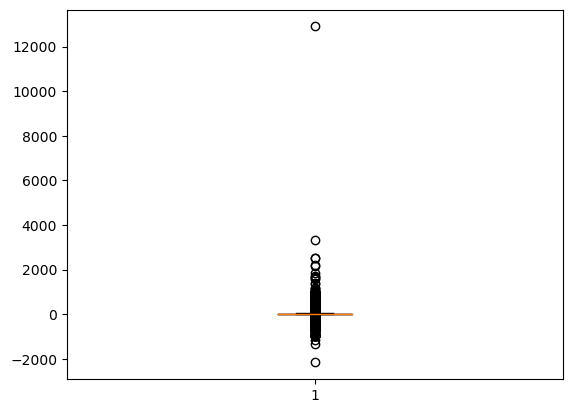

In [18]:
#checking outliers in fare_amount column 
plt.boxplot(df['fare_amount'])

In [19]:
#There are so many negative values in the fare_amount column which is absurd. No one pays in negative amount of money. It must be an data entry mistake as a hyphen is causing the amoutn to appear negative. SO let's replace negative values by turning them into positive values
df['fare_amount'] = df['fare_amount'].abs()

{'whiskers': [<matplotlib.lines.Line2D at 0x212410575d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21241064e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x212410414d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21241066510>],
 'fliers': [<matplotlib.lines.Line2D at 0x21241066ed0>],
 'means': []}

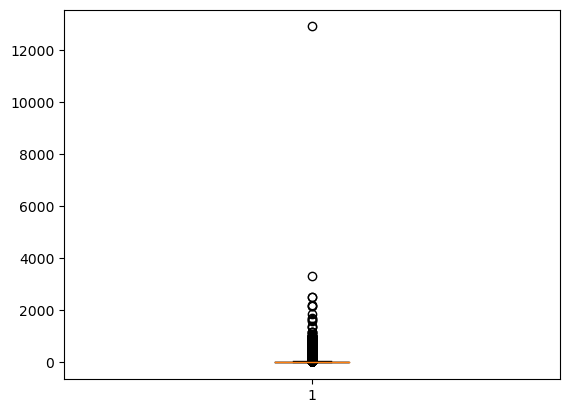

In [20]:
plt.boxplot(df['fare_amount'])

In [21]:
#removing outliers
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

In [22]:
df.sample()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee,duration
12353868,2,2024-04-27 20:25:16,2024-04-27 20:52:20,1.0,2.01,1.0,246,233,Card,22.6,0.0,27.6,2.5,0.0,27.066667


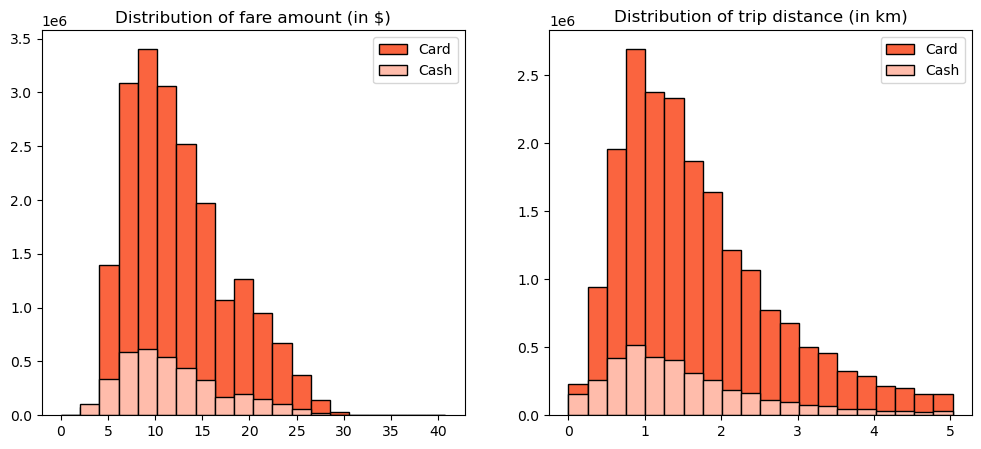

In [23]:
#checking the fare_amount and trip_distance distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.title('Distribution of fare amount (in $)')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FA643F', label ='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FFBCAB' , label = 'Cash')
plt.legend()

plt.subplot(1,2,2) 
plt.title('Distribution of trip distance (in km)')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FA643F', label ='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FFBCAB' , label = 'Cash')
plt.legend()

plt.show()

#### A normal but left-skewed distribution for fare amount and trip distance in NYC cabs suggests specific characteristics and trends in the data. 
- Short-Distance Trips Dominate
A left-skew implies that there are more trips with shorter distances and lower fares, while longer distances and higher fares are less frequent.
Possible reasons:
Many taxi rides occur in densely populated areas like Manhattan, where trips are often short.
Tourists or locals may prefer taxis for quick commutes over other modes of transport.
- Peak Usage in Urban Cores
High-frequency short-distance trips could be influenced by areas with heavy foot traffic, such as:
Business districts, shopping areas, or transit hubs.
Frequent use of cabs to travel within such zones explains shorter trips.
- Impact of Ride-Sharing Services
NYC cabs face competition from ride-sharing platforms, potentially skewing the demand:
Short-distance trips might remain with traditional cabs.
Ride-sharing apps may take longer or more expensive rides.
- Congestion and Travel Speed
Urban congestion affects trip distance and fare calculation:
Slow traffic in busy areas leads to shorter trip distances despite longer durations, reducing fare amounts.
Drivers may avoid longer trips during peak hours.



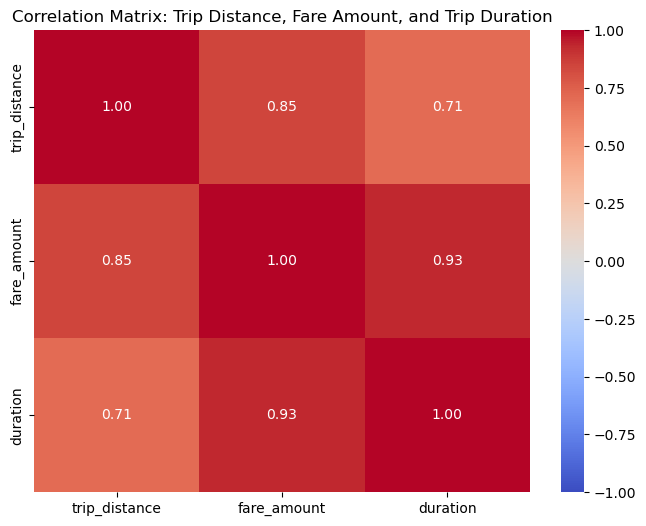

In [43]:
df_subset = df[['trip_distance', 'fare_amount', 'duration']]

# Calculate the correlation matrix
corr_matrix = df_subset.corr()

# Create a heatmap with gradient colors
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)

# Title and display
plt.title('Correlation Matrix: Trip Distance, Fare Amount, and Trip Duration')
plt.show()

-. **Trip Distance and Fare Amount**: There is a strong positive correlation (**0.85**) between `trip_distance` and `fare_amount`, suggesting that longer trips tend to result in higher fare amounts.

- **Trip Distance and Duration**: There is a moderate positive correlation (**0.71**) between `trip_distance` and `duration`, indicating that longer trips generally take more time, though other factors might also influence trip duration.

- **Fare Amount and Duration**: The strong positive correlation (**0.93**) between `fare_amount` and `duration` suggests that trips that take longer are more likely to have higher fares, likely due to the time-based pricing component.

Overall, the data suggests that longer trips (both in terms of distance and duration) tend to result in higher fares.

In [24]:
# Group by 'payment_type' and 'passenger_count', and count the occurrences
pass_count = df.groupby(['payment_type', 'passenger_count']).size().reset_index(name='count')
pass_count['perc'] = (pass_count['count'] / pass_count['count'].sum()) * 100
print(pass_count)

   payment_type  passenger_count     count       perc
0          Card              0.0    232185   0.978697
1          Card              1.0  15831021  66.730303
2          Card              2.0   2711150  11.427934
3          Card              3.0    625563   2.636849
4          Card              4.0    336125   1.416821
5          Card              5.0    188080   0.792787
6          Card              6.0    128993   0.543726
7          Card              7.0         6   0.000025
8          Card              8.0         7   0.000030
9          Card              9.0         4   0.000017
10         Cash              0.0     50082   0.211104
11         Cash              1.0   2738432  11.542932
12         Cash              2.0    563822   2.376601
13         Cash              3.0    146394   0.617074
14         Cash              4.0    109896   0.463229
15         Cash              5.0     36274   0.152901
16         Cash              6.0     25844   0.108937
17         Cash             

In [25]:
df_c = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df_c['payment_type'] = ['Card', 'Cash']
df_c.iloc[0,1:] = pass_count.iloc[0:5,-1]
df_c.iloc[1,1:] = pass_count.iloc[5,-1]
df_c

,payment_type,1,2,3,4,5
0,Card,0.978697,66.730303,11.427934,2.636849,1.416821
1,Cash,0.792787,0.792787,0.792787,0.792787,0.792787


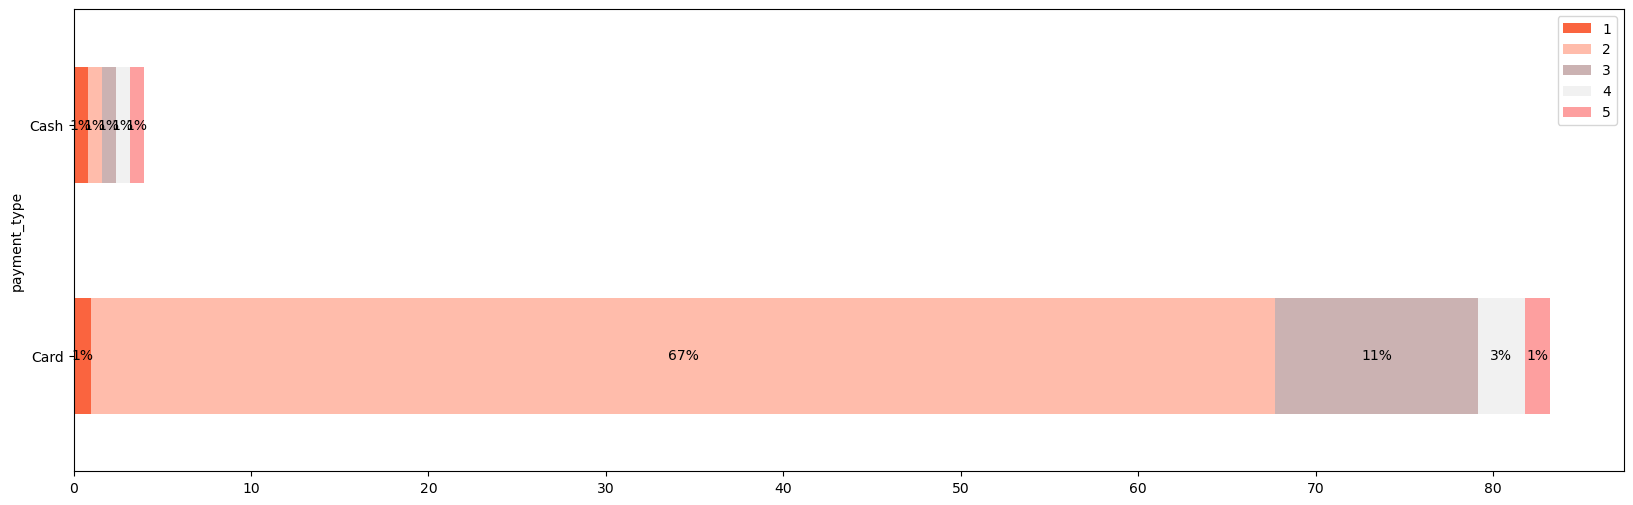

In [26]:
fig,ax = plt.subplots(figsize=(20,6))
df_c.plot(x='payment_type',kind = 'barh',stacked=True, ax=ax, color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1', '#FD9F9F'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.text(x + width /2, 
            y + height /2, 
            '{:.0f}%'.format(width),
            horizontalalignment='center', 
            verticalalignment='center')

In [27]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           12.695178  5.312973      1.691808  1.005378
Cash           11.941750  5.396037      1.529953  1.020317

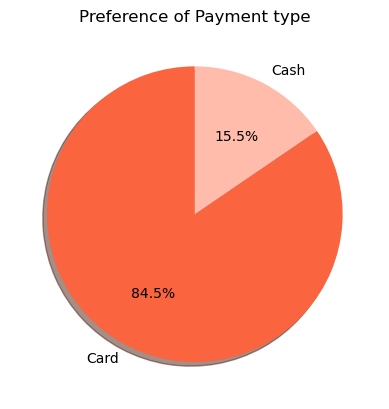

In [28]:
plt.title('Preference of Payment type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels = df['payment_type'].value_counts().index, startangle =90, shadow= True, autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

A/B Testing

Null Hypothsis: There is no difference in average fare between customers who use credit card and customers who use cash.

Alternative Hypothsis: There is a difference in average fare between customers who use credit card and customers who use cash.

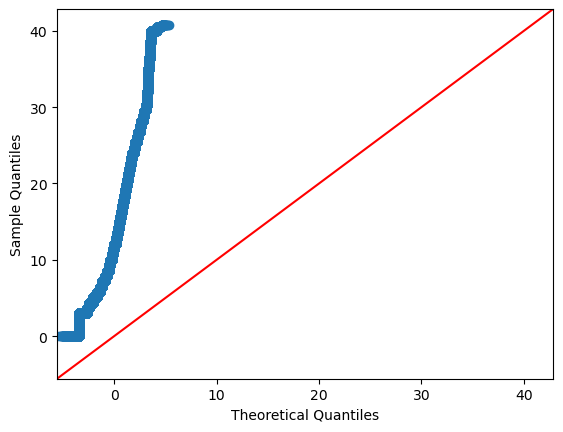

In [29]:
#checking if the data is normaly distributed or not 
sm.qqplot(df['fare_amount'],line='45')
plt.show()

In [30]:
card_sample=df[df['payment_type']=='Card']['fare_amount']
cash_sample=df[df['payment_type']=='Cash']['fare_amount']
t_stats, p_value = st.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print('T statitic', t_stats, 'p_value', p_value)

T statitic 246.53103389295967 p_value 0.0


As p-value is less than 0.05 , we have to reject the null hypothesis.
Which concludes that payment with credit card generates more average fare amount than who use cash.

Now let's consider an analysis for the tip_amount column. We have to first remove the outliers then delete the trip records for which no tip was given.

In [31]:
#removing outliers
for col in ['tip_amount']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df_tip = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

In [32]:
df_tip=df_tip[df['tip_amount'] > 0]

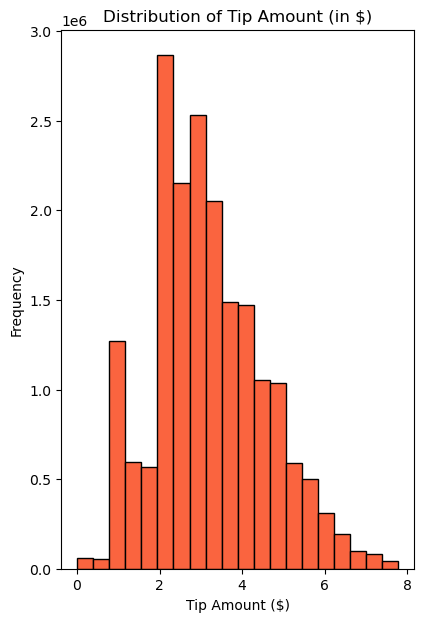

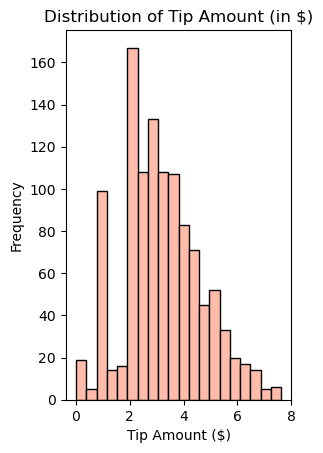

In [33]:
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.title('Distribution of Tip Amount (in $)')
plt.hist(df_tip[df_tip['payment_type']=='Card']['tip_amount'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FA643F', label ='Card')
#plt.hist(df_tip[df_tip['payment_type']=='Cash']['tip_amount'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FFBCAB' , label = 'Cash')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.show()

plt.subplot(1,2,2)
plt.title('Distribution of Tip Amount (in $)')
#plt.hist(df_tip[df_tip['payment_type']=='Card']['tip_amount'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FA643F', label ='Card')
plt.hist(df_tip[df_tip['payment_type']=='Cash']['tip_amount'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FFBCAB' , label = 'Cash')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.show()


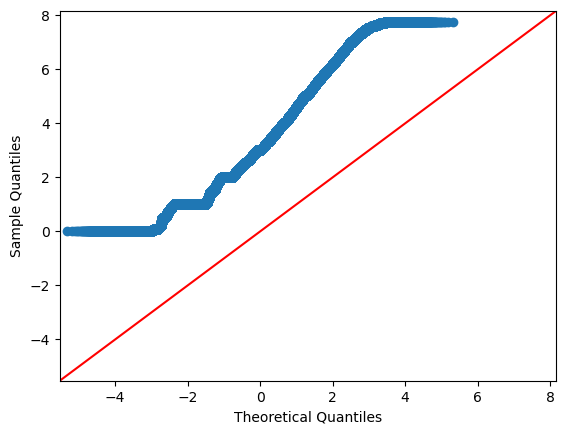

In [34]:
sm.qqplot(df_tip['tip_amount'],line='45')
plt.show()

In [35]:
df_tip.groupby('payment_type').agg({'tip_amount':['mean','std']})

tip_amount          
                   mean       std
payment_type                     
Card           3.188830  1.344264
Cash           3.195927  1.458821

#### A/B Testing

Null Hypothsis: There is no difference in average tip between customers who use credit card and customers who use cash.

Alternative Hypothsis: There is a difference in average tip between customers who use credit card and customers who use cash.

In [36]:
card_sample_tip=df_tip[df_tip['payment_type']=='Card']['tip_amount']
cash_sample_tip=df_tip[df_tip['payment_type']=='Cash']['tip_amount']
t_stats, p_value = st.ttest_ind(a=card_sample_tip, b=cash_sample_tip, equal_var=False)
print('T statitic', t_stats, 'p_value', p_value)

T statitic -0.1629398158554432 p_value 0.8705951857609073


The **T-statistic** of `-0.16` and **p-value** of `0.87` suggest that there is **no statistically significant difference** between the two groups being compared. The high p-value (> 0.05) indicates that we fail to reject the null hypothesis.

#### Implementing Linear Regression

Linear Regression Coefficients: [0.79200406]
Intercept: 3.329468361745292
Mean Squared Error: 3.6960689136436082
R-squared: 0.8700412513326048


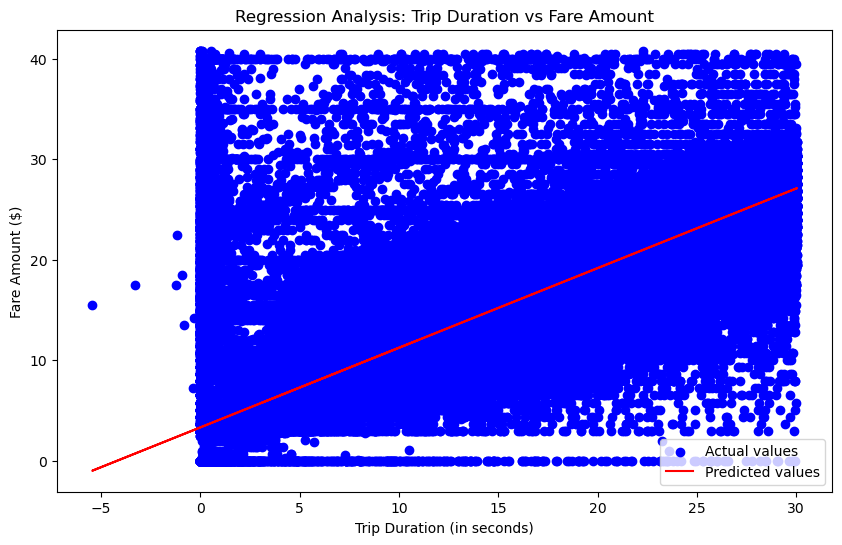

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df contains 'trip_duration' and 'fare_amount' columns
# Clean the data by removing any rows with missing values in these columns
df_clean = df.dropna(subset=['duration', 'fare_amount'])

# Define independent (X) and dependent (y) variables
X = df_clean[['duration']]  # Independent variable (trip_duration)
y = df_clean['fare_amount']      # Dependent variable (fare_amount)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model coefficients and evaluation metrics
print(f'Linear Regression Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Predicted values')
plt.title('Regression Analysis: Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration (in seconds)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.show()


In [54]:
df1 = pd.read_parquet(r'C:\Users\Siddhant Ghosh\Documents\nyc yellow taxi\Data\yellow_tripdata_2024-01.parquet', engine='pyarrow')
df2 = pd.read_parquet(r'C:\Users\Siddhant Ghosh\Documents\nyc yellow taxi\Data\yellow_tripdata_2024-02.parquet', engine='pyarrow')
df3 = pd.read_parquet(r'C:\Users\Siddhant Ghosh\Documents\nyc yellow taxi\Data\yellow_tripdata_2024-03.parquet', engine='pyarrow')
df4 = pd.read_parquet(r'C:\Users\Siddhant Ghosh\Documents\nyc yellow taxi\Data\yellow_tripdata_2024-04.parquet', engine='pyarrow')
df5 = pd.read_parquet(r'C:\Users\Siddhant Ghosh\Documents\nyc yellow taxi\Data\yellow_tripdata_2024-05.parquet', engine='pyarrow')
df6 = pd.read_parquet(r'C:\Users\Siddhant Ghosh\Documents\nyc yellow taxi\Data\yellow_tripdata_2024-06.parquet', engine='pyarrow')
df7 = pd.read_parquet(r'C:\Users\Siddhant Ghosh\Documents\nyc yellow taxi\Data\yellow_tripdata_2024-07.parquet', engine='pyarrow')
df8 = pd.read_parquet(r'C:\Users\Siddhant Ghosh\Documents\nyc yellow taxi\Data\yellow_tripdata_2024-08.parquet', engine='pyarrow')
df9 = pd.read_parquet(r'C:\Users\Siddhant Ghosh\Documents\nyc yellow taxi\Data\yellow_tripdata_2024-09.parquet', engine='pyarrow')
df10 = pd.read_parquet(r'C:\Users\Siddhant Ghosh\Documents\nyc yellow taxi\Data\yellow_tripdata_2024-10.parquet', engine='pyarrow')

df_copy= pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10], ignore_index = True)
df_copy.to_csv('NYC_yellow_taxi_2024.csv', index=False)